# Vectorisation Bag of Words (BoW) avec CountVectorizer et classification avec MultinomialNB

In [1]:
import os
import pandas as pd

path = "data/text_classification/"

# dataset dict with emtpy attribute train
dataset = pd.DataFrame()

for file in os.listdir(path):
    if file.endswith(".csv"):
        new_data = pd.read_csv(path + file, sep=";")
        dataset = pd.concat([dataset, new_data], ignore_index=True)

dataset

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,zrkrwmgseetfegaozv kovx vh,0,0,0,1
1,Comment puis-je me rendre de l'aéroport de CHA...,1,0,0,0
2,4f3;S0`HsL# hL8ydlwlM2cK7=,0,0,0,1
3,"u*]P\UsbAr,CoDnDdr*-GKN(0O",0,0,0,1
4,J'aimerais connaître le chemin pour aller de S...,1,0,0,0
...,...,...,...,...,...
1302960,Il a prétendu être mon ami.,0,0,1,0
1302961,I am planning a trip from saint paul les dax t...,0,1,0,0
1302962,Go from the train station of Loches to Venarey...,0,1,0,0
1302963,Je souhaiterais aller à verneuil sur serre dep...,1,0,0,0


In [2]:
labels = [label for label in dataset.columns if label not in ['text']]
id2label = {i:label for i, label in enumerate(labels)}
label2id = {v:k for k,v in id2label.items()}

print(labels)

['CORRECT', 'NOT_FRENCH', 'NOT_TRIP', 'UNKNOWN']


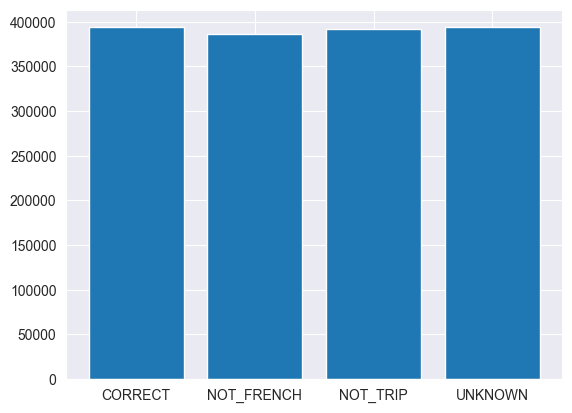

In [3]:
import matplotlib.pyplot as plt

plt.bar(labels, [sum(dataset[label]) for label in labels])
plt.show()

# Stemming (racinisation)

In [4]:
import nltk

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to C:\Users\Eliott
[nltk_data]     Clavier\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Eliott
[nltk_data]     Clavier\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

stemmer = PorterStemmer()
stop_words = set(stopwords.words('french'))

In [6]:
import re

def stem_text(text: str):
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize the text
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(stemmed_words)

In [7]:
dataset['text'] = dataset['text'].apply(stem_text)

In [8]:
dataset[dataset['CORRECT'] == 1]

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
1,comment pui rendr aéroport chalon saon ternay ...,1,0,0,0
4,aimerai connaîtr chemin aller saint paul dax l...,1,0,0,0
5,hopit clell hopit narbonn,1,0,0,0
6,a moyen atteindr boën depui longuevil,1,0,0,0
9,indiqu chemin depui hopit castr jusqu hopit dr...,1,0,0,0
...,...,...,...,...,...
1302954,cherch déplacer ver libourn depui hopit sedan ...,1,0,0,0
1302958,comment aller bagnèr luchon depui anneci,1,0,0,0
1302959,a train hopit saint éloy mine morez,1,0,0,0
1302963,souhaiterai aller verneuil serr depui châteaur...,1,0,0,0


# Split du dataset en train, test et validation

In [9]:
from sklearn.model_selection import train_test_split

# Shuffle train dataset, and pick 50% of it
dataset = dataset.sample(frac=0.5, random_state=0)
X_train = dataset['text']
y_train = dataset[labels]

# To check how vectorizer works without UNKNOWN words being isolated
X_train_without_unknown = dataset[dataset['UNKNOWN'] == 0]['text']
y_train_without_unknown = dataset[dataset['UNKNOWN'] == 0][labels]

# Split test dataset into 10% validation and 10% test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(521185,) (65148,) (65149,)
(521185, 4) (65148, 4) (65149, 4)


In [10]:
X_train.values

array(['zdu ld z 2rnrw l6r fcb', '5 rfj ij6 em h4 dl2 jqi o',
       'ut tsca wwz u zm hsphv v', ...,
       'recherch chemin plu court entr janzé mouchard',
       'pourrai guider ver hopit gaillac depui hopit foix',
       'peux aider trouver chemin ver kehl partant carnoul'], dtype=object)

# Exemple d'utilisation de CountVectorizer

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<521185x391889 sparse matrix of type '<class 'numpy.int64'>'
	with 3435346 stored elements in Compressed Sparse Row format>

La plupart des features extraites sont des mots issus de la classe UNKNOWN générés aléatoirement mais qui apparaissent très peu de fois 

In [12]:
v.get_feature_names_out()[100000:100050]

array(['enal', 'enalya', 'enam', 'enamorada', 'enamorado', 'enanfr',
       'enano', 'enaok', 'enap', 'enapfrra', 'enara', 'enat', 'enavyg',
       'enawari', 'enaya', 'enaz', 'enaël', 'enaï', 'enb', 'enb9',
       'enbalak', 'enbbrfwhdsoep', 'enbea', 'enbfepvlx', 'enbh', 'enbl',
       'enbm', 'enbnfhxsgoocmdaeukc', 'enbv', 'enbwp', 'enbxbzsug',
       'enbxu', 'enc', 'enc5fi3gr', 'encabezado', 'encabritó', 'encaja',
       'encamp', 'encanta', 'encantada', 'encantado', 'encantador',
       'encantadora', 'encantan', 'encantaría', 'encanto', 'encantó',
       'encarcelart', 'encarcelarán', 'encargarán'], dtype=object)

In [13]:
# Number of identified features
v.get_feature_names_out().shape

(391889,)

In [14]:
v = CountVectorizer()

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<454735x68240 sparse matrix of type '<class 'numpy.int64'>'
	with 3552276 stored elements in Compressed Sparse Row format>

In [15]:
# Number of identified features
v.get_feature_names_out().shape

(68240,)

In [16]:
v.get_feature_names_out()[30000:30050]

array(['incontin', 'incontr', 'incontra', 'incontrai', 'incontrano',
       'incontrar', 'incontrarl', 'incontrarla', 'incontrarlo',
       'incontrarsi', 'incontrarti', 'incontrarvi', 'incontrata',
       'incontrati', 'incontrato', 'incontreremo', 'incontreret',
       'incontrerà', 'incontrerò', 'incontri', 'incontriamoci',
       'incontro', 'incontrolablement', 'incontrò', 'inconveni',
       'inconvenienc', 'inconvenient', 'inconvéni', 'incoraggiarlo',
       'incoraggiati', 'incoraggiato', 'incorpor', 'incorrect',
       'incorrecta', 'incorrectli', 'incorrecto', 'incoscient',
       'incoscienti', 'increas', 'increasingli', 'incred', 'incredibil',
       'incredibilment', 'increment', 'incrementándos', 'increíbl',
       'increíblement', 'incroci', 'incrociato', 'incroy'], dtype=object)

In [17]:
# Add threshold to observe only words that appear at least 100 times
v = CountVectorizer(min_df=100)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<454735x1837 sparse matrix of type '<class 'numpy.int64'>'
	with 3285538 stored elements in Compressed Sparse Row format>

In [18]:
# Number of identified features
v.get_feature_names_out().shape

(1837,)

In [19]:
v.get_feature_names_out()[::50]

array(['11', 'alreadi', 'arrivé', 'barbièr', 'bin', 'buisson', 'cerci',
       'chose', 'could', 'destin', 'dragon', 'erdr', 'feur', 'gehen',
       'habe', 'hotel', 'job', 'lauterbourg', 'look', 'male', 'messmer',
       'month', 'name', 'obermodern', 'parent', 'pl', 'préci', 'rejoindr',
       'rte', 'sehr', 'souvenir', 'temp', 'too', 'uno', 'vez', 'we', 'ya'],
      dtype=object)

# Utilisation d'un pipeline SKLearn (vectorizer + classifier MultinomialNB avec OneVsRestClassifier pour la classification multi-label)

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', OneVsRestClassifier(MultinomialNB()))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', OneVsRestClassifier(estimator=MultinomialNB()))])

# Evaluation du modèle, métriques

In [21]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     CORRECT       0.90      1.00      0.95     19839
  NOT_FRENCH       0.98      1.00      0.99     19193
    NOT_TRIP       0.97      0.89      0.93     19490
     UNKNOWN       1.00      0.81      0.89     19615

   micro avg       0.96      0.93      0.94     78137
   macro avg       0.96      0.93      0.94     78137
weighted avg       0.96      0.93      0.94     78137
 samples avg       0.91      0.91      0.91     78137


C:\Developpement\environments\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

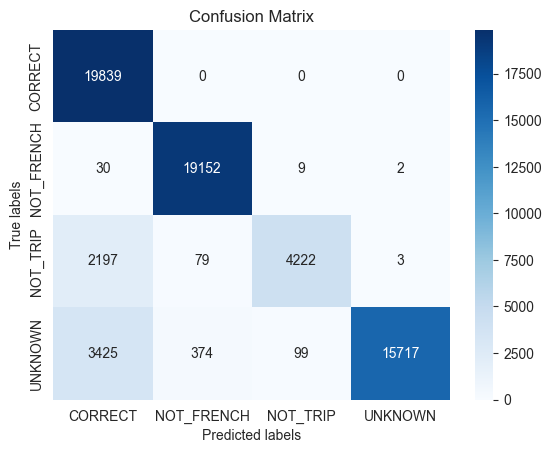

In [23]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

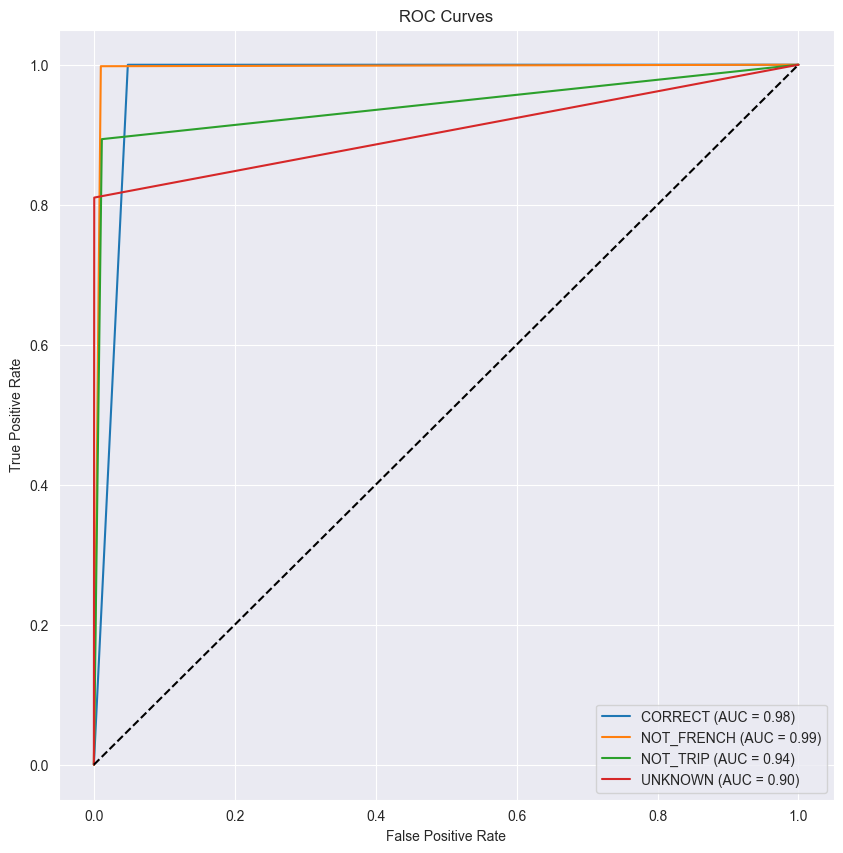

In [24]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test.values[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(10, 10))

for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [25]:
texts = [
    "Je veux aller au cinéma",
    "Je veux aller du cinéma au restaurant",
    "I'd like to go from the cinema to the restaurant",
    "I'd like to Paris from Nanterre",
    "zaeazea eaz e:az e,az e\"zahoiplù;!:gf",
    "J'aimerais me rendre de Nanterre à Paris",
    "Je veux aller de Le Havre à Port-Boulet",
    "Nantes à Toulouse",
    "Dirige moi vers Lyon depuis Saint-Étienne.",
    "Trouve moi un itinéraire pour aller chez Emma de Paris à Marseille",
]

predicted_labels = pipeline.predict(texts)
predicted_proba = pipeline.predict_proba(texts)

# Displaying the predicted labels and probability scores for new texts
for text, p_labels, prob in zip(texts, predicted_labels, predicted_proba):
    print("*", text)
    for i, score in enumerate(prob):
        print(' -', id2label[i], '=>', f"{round(score * 100, 1)}%")
    print()

* Je veux aller au cinéma
 - CORRECT => 0.2%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 99.1%
 - UNKNOWN => 0.0%

* Je veux aller du cinéma au restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 100.0%
 - UNKNOWN => 0.0%

* I'd like to go from the cinema to the restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 97.3%
 - UNKNOWN => 0.0%

* I'd like to Paris from Nanterre
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 7.5%
 - UNKNOWN => 0.0%

* zaeazea eaz e:az e,az e"zahoiplù;!:gf
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 100.0%

* J'aimerais me rendre de Nanterre à Paris
 - CORRECT => 30.3%
 - NOT_FRENCH => 29.5%
 - NOT_TRIP => 30.1%
 - UNKNOWN => 30.2%

* Je veux aller de Le Havre à Port-Boulet
 - CORRECT => 78.5%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 3.9%
 - UNKNOWN => 0.0%

* Nantes à Toulouse
 - CORRECT => 30.3%
 - NOT_FRENCH => 29.5%
 - NOT_TRIP => 30.1%
 - UNKNOWN => 30.2%

* Dirige moi vers Lyon depuis Saint-É

# La performance du modèle semble équivalent à la version avec seulement les stops words. Cependant, le modèle semble plus serein sur les pourcentages de confiance pour chaque label (beaucoup plus de 100% pour le label à prédire) et de 0% pour les autres labels).

In [26]:
# print few predictions from test dataset where classifier failed
for i in range(len(y_test)):
    if (y_test.values[i] != y_pred[i]).any():
        print(X_test.values[i])
        print("True labels:", [id2label[i] for i, label in enumerate(y_test.values[i]) if label == 1])
        print("Predicted labels:", [id2label[i] for i, label in enumerate(y_pred[i]) if label == 1])
        print()

cvpvwbgm pqejd yvjvcc q
True labels: ['UNKNOWN']
Predicted labels: []

cherch moyen partir st gervai mairi
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

r 3ir8p h 6 _bml m2rp4w
True labels: ['UNKNOWN']
Predicted labels: []

e2uyc lk1bja9 w nn9 p
True labels: ['UNKNOWN']
Predicted labels: []

fdlphxdzvsq bevyxjzgurbuag
True labels: ['UNKNOWN']
Predicted labels: []

1hx z timxe5 k 6fv_m 2
True labels: ['UNKNOWN']
Predicted labels: []

cherch moyen partir hopit morcenx
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT']

rfpm xwey xppu wjzee
True labels: ['UNKNOWN']
Predicted labels: []

b7eu mc1dxb tc80 w
True labels: ['UNKNOWN']
Predicted labels: []

i 3 bqvsa iyp3xzn nxgui
True labels: ['UNKNOWN']
Predicted labels: []

dirigez ver vill volvic depui autr vill
True labels: ['NOT_TRIP']
Predicted labels: ['CORRECT', 'NOT_TRIP']

zcxvpnearaotpigaownpdsrik
True labels: ['UNKNOWN']
Predicted labels: []

nbesymk phyatzogirpieon g
True labels: ['UNKNOWN']
Predicted labels: []

o